# Dataset e bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/MAI0881/datasets/main/ionosphere.data', sep=',', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


# Treino e Teste

In [3]:
# divisão target e features

X = df.drop([34], axis=1).values
y = df[34]

In [4]:
#treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [5]:
k = 5
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = neigh.predict(X_test)

  File "C:\Users\Maiara\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


# Métricas de Avaliação

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           b       0.94      0.66      0.77        44
           g       0.80      0.97      0.88        62

    accuracy                           0.84       106
   macro avg       0.87      0.81      0.82       106
weighted avg       0.86      0.84      0.83       106



# Seleção de Features por limiar de variância

In [7]:
limiar_de_variancia = 0.35
X_limiar = pd.DataFrame(X)
selecao_limiar = VarianceThreshold(threshold=limiar_de_variancia)
X_selecionado_limiar = selecao_limiar.fit_transform(X_limiar)
mascara_selecionada = selecao_limiar.get_support()
features_selecionadas_limiar = pd.DataFrame(X_selecionado_limiar, columns=X_limiar.columns[mascara_selecionada])

print("Formato dos dados Originais:", X.shape)
print("Formato dos dados após a seleção de features:", features_selecionadas_limiar.shape)

Formato dos dados Originais: (351, 34)
Formato dos dados após a seleção de features: (351, 6)


In [8]:
#treino e teste

X_limiar_train, X_limiar_test, y_limiar_train, y_limiar_test = train_test_split(features_selecionadas_limiar, y, test_size=0.3, random_state=0)

In [9]:
neigh_var = KNeighborsClassifier(n_neighbors = k).fit(X_limiar_train,y_limiar_train)
y_pred_var = neigh_var.predict(X_limiar_test)

In [10]:
print(classification_report(y_limiar_test, y_pred_var))

              precision    recall  f1-score   support

           b       0.90      0.61      0.73        44
           g       0.78      0.95      0.86        62

    accuracy                           0.81       106
   macro avg       0.84      0.78      0.79       106
weighted avg       0.83      0.81      0.80       106



## Extração de Features por Análise de Componentes Principais (PCA)

In [11]:
# Criando o modelo através de um número de componentes principais definido pela porcentagem de variancia
pca = PCA(n_components = 0.85)

# Aplicando a PCA
P = pca.fit_transform(X)

print("Formato dos dados Originais:", X.shape)
print("Formato dos dados após a seleção de features:", P.shape)

Formato dos dados Originais: (351, 34)
Formato dos dados após a seleção de features: (351, 15)


In [12]:
#treino e teste

X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(P, y, test_size=0.3, random_state=0)

In [13]:
neigh_pca = KNeighborsClassifier(n_neighbors = k).fit(X_pca_train,y_pca_train)
y_pred_pca = neigh_pca.predict(X_pca_test)

In [14]:
print(classification_report(y_pca_test, y_pred_pca))

              precision    recall  f1-score   support

           b       0.94      0.73      0.82        44
           g       0.83      0.97      0.90        62

    accuracy                           0.87       106
   macro avg       0.89      0.85      0.86       106
weighted avg       0.88      0.87      0.86       106



# Análise

#### Compare os resultados obtidos em todos os processos do item anterior e justifique as diferenças obtidas através dos conceitos de engenharia de features estudados durante as aulas síncronas.

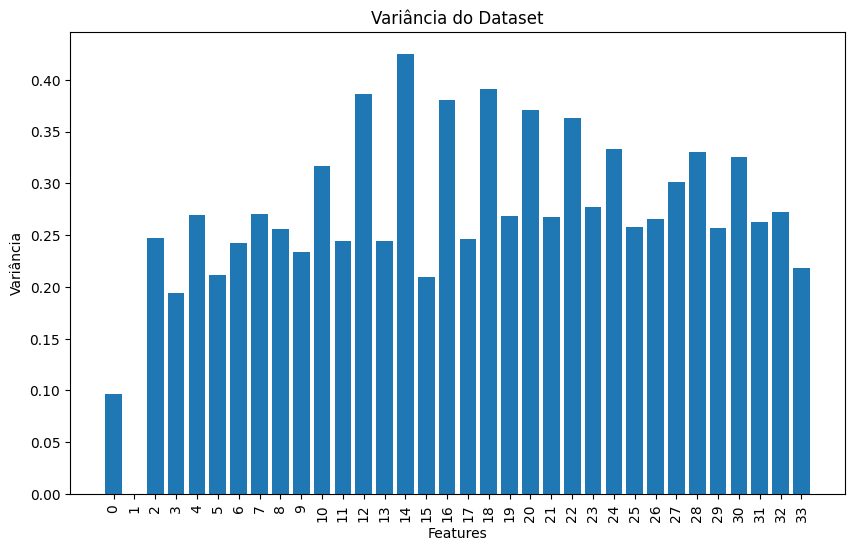

In [15]:
X_analise = pd.DataFrame(X)
variancia = np.var(X, axis=0)

plt.figure(figsize=(10, 6))
plt.bar(range(len(variancia)), variancia, tick_label=X_analise.columns)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Variância')
plt.title('Variância do Dataset')
plt.show()

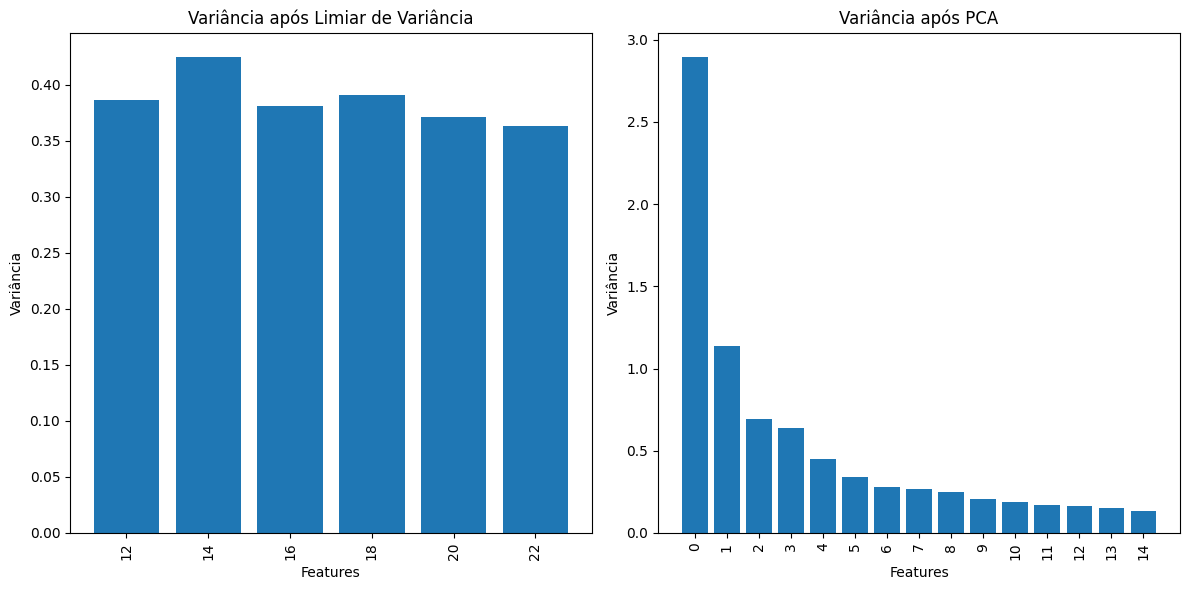

In [16]:
P = pd.DataFrame(P)

variancia_limiar = np.var(features_selecionadas_limiar, axis=0)

variancia_PCA = np.var(P , axis=0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.bar(range(len(variancia_limiar)), variancia_limiar, tick_label=features_selecionadas_limiar.columns)
ax1.set_xticks(range(len(variancia_limiar)))
ax1.set_xticklabels(features_selecionadas_limiar.columns, rotation=90)
ax1.set_xlabel('Features')
ax1.set_ylabel('Variância')
ax1.set_title('Variância após Limiar de Variância')

ax2.bar(range(len(variancia_PCA)), variancia_PCA, tick_label=P.columns)
ax2.set_xticks(range(len(variancia_PCA)))
ax2.set_xticklabels(P.columns, rotation=90)
ax2.set_xlabel('Features')
ax2.set_ylabel('Variância')
ax2.set_title('Variância após PCA')

plt.tight_layout()
plt.show()

* Quando aplicamos o algoritmo de Variância Limiar no nosso Dataset, o que ele fez foi simplesmente analisar singularmente cada feature e remover as features que possuem uma variância abaixo do nosso critério de variância mínima, independentemente das demais features. Isso faz com que a gente mantenha features que são na verdade ruído mas ainda estão dentro do percentual que determinamos.

* O PCA é capaz de analisar as relações entre todas as features simultaneamente e criar novas features que são combinações lineares das originais. No nosso novo espaço de dados, as 2 primeiras features explicam a maior parte da variância.

# Adequando o parâmetro 'k' com base na nova representação de dados

In [17]:
neigh_adeq = KNeighborsClassifier(n_neighbors = 2).fit(X_pca_train,y_pca_train)
y_pred_adeq = neigh_adeq.predict(X_pca_test)
print(classification_report(y_pca_test, y_pred_adeq))

              precision    recall  f1-score   support

           b       0.95      0.86      0.90        44
           g       0.91      0.97      0.94        62

    accuracy                           0.92       106
   macro avg       0.93      0.92      0.92       106
weighted avg       0.93      0.92      0.92       106



* As features que não contribuem muito para a variabilidade dos dados, ao serem eliminadas ou combinadas em componentes principais menos importantes no PCA, fazem com que o algoritmo tenha uma compreensão mais clara dos padrões e estruturas dos dados.
* O KNN é sensível às escalas das features e o PCA padroniza automaticamente nosso dataset mitigando problemas de escala que podem afetar o desempenho do KNN.